## Model Representation

To establish notation for future use, we’ll use $x^{(i)}x$ to denote the “input” variables (living area in this example), also called input features, and $y^{(i)}y$ to denote the “output” or target variable that we are trying to predict (price). A pair $(x^{(i)}$ , $y^{(i)} )$ is called a training example, and the dataset that we’ll be using to learn—a list of m training examples ${(x^{(i)} , y^{(i)} ); i = 1, . . . , m}$ is called a training set. 
<br>
To describe the supervised learning problem slightly more formally, our goal is, given a training set, to learn a function $h : X → Y$ so that $h(x)$ is a “good” predictor for the corresponding value of y. For historical reasons, this function h is called a hypothesis. <br> <br>
<img src="img/cf_1.png" width="400" height="300">

## Cost Function
We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's and the actual output y's.

$$J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2 = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2
$$
To break it apart, it is $\frac{1}{2}\bar{x}$ where $\bar{x}$ is the mean of the squares of $h_\theta (x_{i}) - y_{i}$ or the difference between the predicted value and the actual value.
<br>
This function is otherwise called the "Squared error function", or "Mean squared error". The mean is halved $\left(\frac{1}{2}\right)$ as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$ term.

## Gradient Descent
Imagine that we graph our hypothesis function based on its fields $\theta_0$ and $\theta_1$ (actually we are graphing the cost function as a function of the parameter estimates). The way we get the values of $\theta_0$ and $\theta_1$ is by using gradient descent. We take the derivative (the tangential line to a function) of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent. The size of each step is determined by the parameter $\alpha$, which is called the learning rate.
<br>
The gradient descent algorithm is:
<br>
repeat until convergence:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$$
where j=0,1 represents the feature index number.
<br>
At each iteration j, one should simultaneously update the parameters $\theta_1, \theta_2,...,\theta_n$ . Updating a specific parameter prior to calculating another one on the $j^{(th)}$ iteration would yield to a wrong implementation. 

## Implementing Gradient Descent for a Simple Linear 1D Regression

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [3]:
x = np.arange(1,10)
y = np.arange(2,20,2)

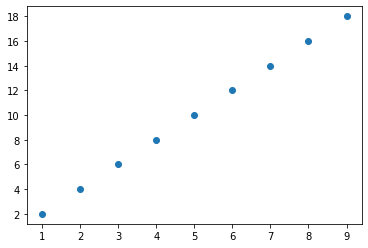

In [5]:
plt.scatter(x,y)

In [27]:
#Hypothesis
def h(theta0, theta1):
    return theta0+x*theta1

#Cost function
def J(theta0, theta1, y):
    error = h(theta0, theta1)-y
    variance = np.sum(error**2)
    return variance/(2*len(x))


In [65]:
def gd1(theta0, cf, alpha, theta1, y):
    cf_diff = derivative(func=cf, x0=theta0, dx=0.00001, args=(theta1,y))
    theta0 = theta0 - alpha*cf_diff
    return theta0

In [68]:
gd1(0,J,0.3,0,y)

2.999999999886427

In [37]:
theta0 = 1
theta1 = 1
J_diff = derivative(func=J(theta1=theta1, y=y), x0=theta0, dx=0.00001)

TypeError: J() missing 1 required positional argument: 'theta0'

In [78]:
def fun1(x,a,b):
    return 2*x**2+a*x+b**2*x

In [80]:
derivative(fun1, x0=0, args=(1,2))

5.0

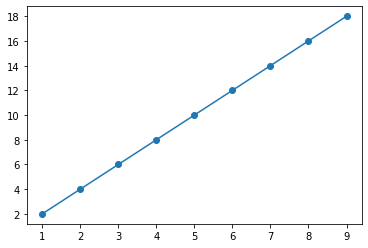

In [17]:
plt.scatter(x,y)
plt.plot(x, h(0,2))

In [81]:
def guassian(x,a):
    return np.e**(-a*x**2)

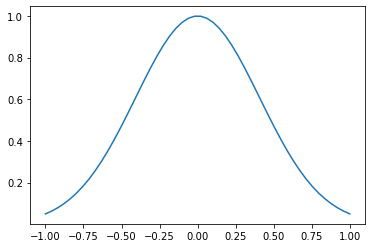

In [98]:
x = np.linspace(-1,1,50)
plt.plot(x, guassian(x,3))
imgout = plt.show()

In [100]:
type(imgout)

NoneType

list

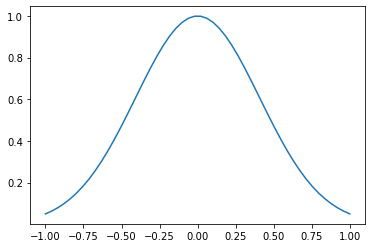

In [96]:
img = plt.plot(x, guassian(x,3))


In [95]:
img.show()

AttributeError: 'list' object has no attribute 'show'

TclError: unknown option "-img"

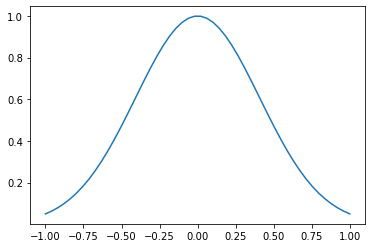

In [102]:
import tkinter as tk
from PIL import Image, ImageTk

def image():
    lbl1.config(img = plt.plot(x, guassian(x,3)))

window = tk.Tk()
sld1 = tk.Scale(window, from_ = 0,to=12, orient=tk.HORIZONTAL)
sld1.pack()

lbl1 = tk.Label(window)
lbl1.pack()
cnv1 = tk.Canvas()
cnv1.config(img = plt.plot(x, guassian(x,3)))
cnv1.pack()

window.mainloop()